In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('excel.csv',encoding = 'unicode_escape')

In [3]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [4]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [5]:
current_date = pd.to_datetime('1/1/2012')
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [6]:
current_date

Timestamp('2012-01-01 00:00:00')

In [10]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [11]:
max_date = df.groupby('CustomerID').max()

In [12]:
max_date

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
CustomerID,,,,,,,
12346.0,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:17:00,1.04,United Kingdom
12347.0,581180,85232D,WOODLAND DESIGN COTTON TOTE BAG,240,2011-12-07 15:52:00,12.75,Iceland
12348.0,568172,POST,SWEETIES STICKERS,144,2011-09-25 13:13:00,40.00,Finland
12349.0,577609,POST,ZINC FOLKART SLEIGH BELLS,36,2011-11-21 09:51:00,300.00,Italy
12350.0,543037,POST,UNION JACK FLAG PASSPORT COVER,24,2011-02-02 16:01:00,40.00,Norway
...,...,...,...,...,...,...,...
18280.0,545712,82484,WOODEN UNION JACK BUNTING,8,2011-03-07 09:52:00,9.95,United Kingdom
18281.0,556464,23209,ROBOT BIRTHDAY CARD,12,2011-06-12 10:53:00,16.95,United Kingdom
18282.0,C562808,23295,SET OF 12 MINI LOAF BAKING CASES,48,2011-12-02 11:43:00,12.75,United Kingdom


In [13]:
maxdate = df.groupby(['CustomerID']).max()[['InvoiceDate']]

In [14]:
maxdate

,InvoiceDate
CustomerID,
12346.0,2011-01-18 10:17:00
12347.0,2011-12-07 15:52:00
12348.0,2011-09-25 13:13:00
12349.0,2011-11-21 09:51:00
12350.0,2011-02-02 16:01:00
...,...
18280.0,2011-03-07 09:52:00
18281.0,2011-06-12 10:53:00
18282.0,2011-12-02 11:43:00


In [15]:
(current_date - maxdate['InvoiceDate']).dt.days

CustomerID
12346.0    347
12347.0     24
12348.0     97
12349.0     40
12350.0    332
          ... 
18280.0    299
18281.0    202
18282.0     29
18283.0     25
18287.0     64
Name: InvoiceDate, Length: 4372, dtype: int64

In [16]:
maxdate['invoiceAge'] = (current_date - maxdate['InvoiceDate']).dt.days

In [17]:
maxdate

,InvoiceDate,invoiceAge
CustomerID,,
12346.0,2011-01-18 10:17:00,347
12347.0,2011-12-07 15:52:00,24
12348.0,2011-09-25 13:13:00,97
12349.0,2011-11-21 09:51:00,40
12350.0,2011-02-02 16:01:00,332
...,...,...
18280.0,2011-03-07 09:52:00,299
18281.0,2011-06-12 10:53:00,202
18282.0,2011-12-02 11:43:00,29


In [18]:
recancy = maxdate.drop('InvoiceDate',axis = 1)

In [19]:
recancy

,invoiceAge
CustomerID,
12346.0,347
12347.0,24
12348.0,97
12349.0,40
12350.0,332
...,...
18280.0,299
18281.0,202
18282.0,29


In [37]:
freq = df.drop_duplicates(['InvoiceNo'])

In [38]:
freq

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08
21,536368,22960,JAM MAKING SET WITH JARS,6,2010-12-01 08:34:00,4.25,13047.0,United Kingdom,25.50
25,536369,21756,BATH BUILDING BLOCK WORD,3,2010-12-01 08:35:00,5.95,13047.0,United Kingdom,17.85
...,...,...,...,...,...,...,...,...,...
541865,581583,20725,LUNCH BAG RED RETROSPOT,40,2011-12-09 12:23:00,1.45,13777.0,United Kingdom,58.00
541867,581584,20832,RED FLOCK LOVE HEART PHOTO FRAME,72,2011-12-09 12:25:00,0.72,13777.0,United Kingdom,51.84
541869,581585,22481,BLACK TEA TOWEL CLASSIC DESIGN,12,2011-12-09 12:31:00,0.39,15804.0,United Kingdom,4.68
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom,23.60


In [39]:
freq = freq.groupby(['CustomerID']).count()[['InvoiceNo']]

In [40]:
freq

,InvoiceNo
CustomerID,
12346.0,2
12347.0,7
12348.0,4
12349.0,1
12350.0,1
...,...
18280.0,1
18281.0,1
18282.0,3


In [41]:
df['total'] = (df['Quantity'] * df['UnitPrice'])

In [42]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [43]:
money = df.groupby(['CustomerID'])['total'].sum()

In [44]:
money

CustomerID
12346.0       0.00
12347.0    4310.00
12348.0    1797.24
12349.0    1757.55
12350.0     334.40
            ...   
18280.0     180.60
18281.0      80.82
18282.0     176.60
18283.0    2094.88
18287.0    1837.28
Name: total, Length: 4372, dtype: float64

In [45]:
df[df['CustomerID'] == 12346.0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,77183.6
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom,-77183.6


In [46]:
RFM = pd.concat([recancy,freq,money],axis = 1)

In [47]:
RFM

,invoiceAge,InvoiceNo,total
CustomerID,,,
12346.0,347,2,0.00
12347.0,24,7,4310.00
12348.0,97,4,1797.24
12349.0,40,1,1757.55
12350.0,332,1,334.40
...,...,...,...
18280.0,299,1,180.60
18281.0,202,1,80.82
18282.0,29,3,176.60


In [48]:
RFM.columns = ['Recency', 'Frequency', 'Monetary']
RFM

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,347,2,0.00
12347.0,24,7,4310.00
12348.0,97,4,1797.24
12349.0,40,1,1757.55
12350.0,332,1,334.40
...,...,...,...
18280.0,299,1,180.60
18281.0,202,1,80.82
18282.0,29,3,176.60


In [49]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
pre_data = std.fit_transform(RFM)

In [50]:
pre_data

array([[ 2.31656788, -0.32936215, -0.23100099],
       [-0.88904975,  0.20610242,  0.29343167],
       [-0.16456032, -0.11517632, -0.01231622],
       ...,
       [-0.83942719, -0.22226923, -0.20951263],
       [-0.87912524,  1.16993863,  0.02390005],
       [-0.49206924, -0.22226923, -0.00744423]])

In [51]:
pre_data.shape

(4372, 3)

In [52]:
from sklearn.cluster import KMeans

In [53]:
k_range = range(1,10)
sse = []
for k in k_range:
    km = KMeans(n_clusters = k)
    km.fit(pre_data)
    sse.append(km.inertia_)

C:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\externals\loky\backend\context.py", line 199, in _count_physical_cores
    cpu_info = subprocess.run(
  File "C:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\subprocess.py", line 501, in r

In [54]:
sse

[13116.000000000002,
 9134.642381209183,
 5527.7008907526115,
 4046.6395856924664,
 3020.2733516539765,
 2383.6300441369044,
 1906.3041416298022,
 1585.5649930710322,
 1397.973880491928]

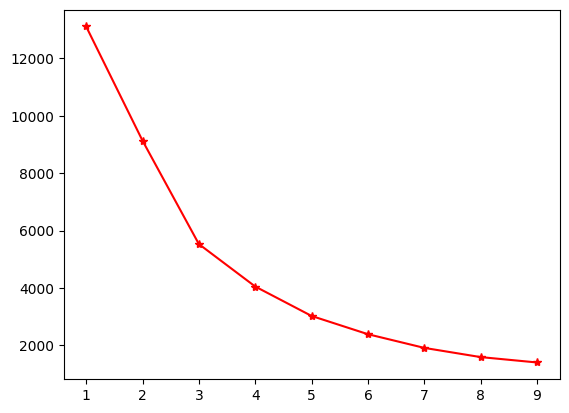

In [58]:
plt.plot(k_range,sse,'r-*')
plt.x_label = 'k'
plt.y_label = 'sum of square error'

In [59]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(pre_data)

C:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [60]:
kmeans.labels_

array([1, 0, 0, ..., 0, 0, 0])

In [61]:
kmeans.labels_ + 1

array([2, 1, 1, ..., 1, 1, 1])

In [62]:
RFM['clusters'] = kmeans.labels_ + 1

In [63]:
RFM

,Recency,Frequency,Monetary,clusters
CustomerID,,,,
12346.0,347,2,0.00,2
12347.0,24,7,4310.00,1
12348.0,97,4,1797.24,1
12349.0,40,1,1757.55,1
12350.0,332,1,334.40,2
...,...,...,...,...
18280.0,299,1,180.60,2
18281.0,202,1,80.82,2
18282.0,29,3,176.60,1


In [64]:
RFM[RFM['clusters'] == 1]

,Recency,Frequency,Monetary,clusters
CustomerID,,,,
12347.0,24,7,4310.00,1
12348.0,97,4,1797.24,1
12349.0,40,1,1757.55,1
12352.0,58,11,1545.41,1
12356.0,44,3,2811.43,1
...,...,...,...,...
18277.0,80,2,97.63,1
18278.0,95,1,173.90,1
18282.0,29,3,176.60,1


In [65]:
RFM[RFM['clusters'] == 2]

,Recency,Frequency,Monetary,clusters
CustomerID,,,,
12346.0,347,2,0.00,2
12350.0,332,1,334.40,2
12353.0,226,1,89.00,2
12354.0,254,1,1079.40,2
12355.0,236,1,459.40,2
...,...,...,...,...
18260.0,194,8,2595.00,2
18262.0,162,1,149.48,2
18269.0,380,2,138.90,2


In [66]:
RFM[RFM['clusters'] == 3]

,Recency,Frequency,Monetary,clusters
CustomerID,,,,
12415.0,46,26,123725.45,3
12748.0,22,224,29072.10,3
13089.0,24,118,57385.88,3
13408.0,23,81,27487.41,3
13694.0,25,60,62653.10,3
13798.0,23,63,36351.42,3
14096.0,26,34,57120.91,3
14156.0,31,66,113384.14,3
14298.0,25,45,50862.44,3


In [67]:
final = RFM.groupby(['clusters']).mean()[['Recency', 'Frequency', 'Monetary']]

In [68]:
final

,Recency,Frequency,Monetary
clusters,,,
1,61.518507,5.622455,1825.630038
2,267.622744,1.852888,460.359902
3,27.636364,86.772727,85058.839091


In [70]:
def func(row):
    if row['clusters'] == 3:
        return 'Dimond'
    elif row['clusters'] == 2:
        return 'Gold'
    return 'Silver'

In [71]:
RFM['group'] = RFM.apply(func, axis = 1)

In [72]:
RFM

,Recency,Frequency,Monetary,clusters,group
CustomerID,,,,,
12346.0,347,2,0.00,2,Gold
12347.0,24,7,4310.00,1,Silver
12348.0,97,4,1797.24,1,Silver
12349.0,40,1,1757.55,1,Silver
12350.0,332,1,334.40,2,Gold
...,...,...,...,...,...
18280.0,299,1,180.60,2,Gold
18281.0,202,1,80.82,2,Gold
18282.0,29,3,176.60,1,Silver


In [73]:
result = RFM.group.value_counts()

In [74]:
result

group
Silver    3242
Gold      1108
Dimond      22
Name: count, dtype: int64

<Axes: xlabel='group'>

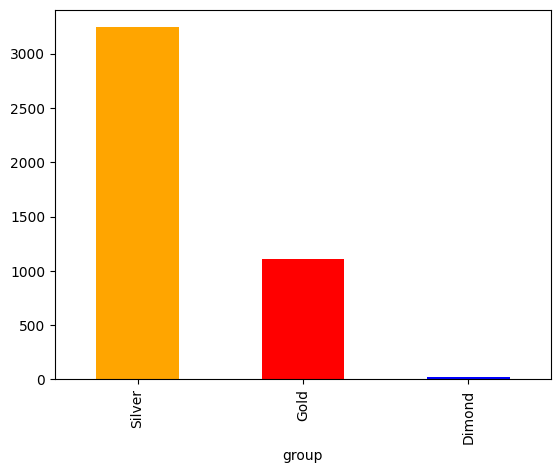

In [75]:
result.plot(kind = 'bar',color = ['orange','red','blue'])